In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\poury\12-2023 Instacart Basket Analysis'

In [4]:
#importing data set
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'ords_prods_customers.pkl'))

In [5]:
ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [6]:
ords_prods_customers.shape

(32434212, 37)

# 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


Security Implication : The data set includes PII's namely : first and last name, family status, income and marital status.

# 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions.

In [4]:
#Creating a region column based on wikipedia information
# Create a new column 'region' and use loc for mapping
ords_prods_customers['region'] = 'West'

ords_prods_customers.loc[
    ords_prods_customers['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),
    'region'
] = 'Northeast'

ords_prods_customers.loc[
    ords_prods_customers['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),
    'region'
] = 'Midwest'

ords_prods_customers.loc[
    ords_prods_customers['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),
    'region'
] = 'South'


In [5]:
ords_prods_customers.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
32434207,49235,Organic Half & Half,53,16,1.8,2542346,80734,prior,3,3,...,Bowers,Male,Alabama,45,2019-09-28,1,married,41072,both,South
32434208,49520,Orange Sparkling Water,115,7,7.5,1363278,74506,prior,1,1,...,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast
32434209,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,prior,2,0,...,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast
32434210,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,prior,3,1,...,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast
32434211,49520,Orange Sparkling Water,115,7,7.5,1680478,74506,prior,4,0,...,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,both,Northeast


In [8]:
#frequency check
ords_prods_customers['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [ ]:
#making groups and normalizing the result
spending_by_region = ords_prods_customers.groupby('region')['spending_flag'].value_counts(normalize=True).unstack() * 100
#defining colors
colors = ['#FF6666', '#a6cee3']

# Plotting the bar chart
ax = spending_by_region.plot(kind='bar', stacked=True, color=colors)

# Adding labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending Flag Distribution by Region')

# Display the legend
ax.legend(title='Spending Flag', loc='upper right')

Spending flag seems to be same at each region.

In [47]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_region_bar.png'), bbox_inches='tight', pad_inches=0.1)

<Figure size 640x480 with 0 Axes>

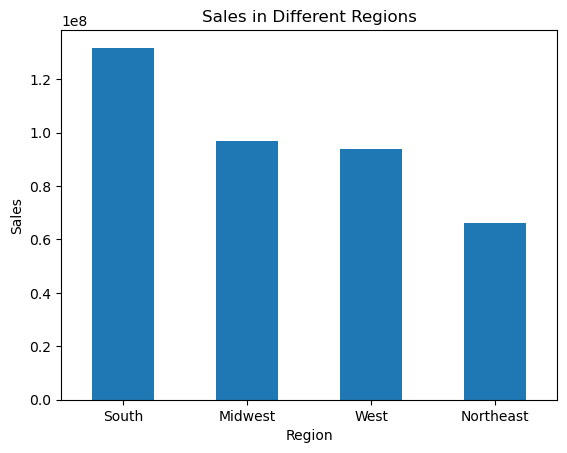

In [14]:
#purchased product prices in different regions
bar_price_region = ords_prods_customers.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(
    title='Sales in Different Regions', xlabel='Region', ylabel='Sales', color='#1f78b4'
)
plt.xticks(rotation=0)
plt.show()

In [16]:
#Saving the bar chart
bar_price_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prices_region.png'))

# 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [6]:
#making exclusion flag 
ords_prods_customers['exclude_flag'] = ords_prods_customers['max_order'] < 5

# Exclude low-activity customers from the data
df_ex = ords_prods_customers[~ords_prods_customers['exclude_flag']]

In [41]:
sample_less_5 = ords_prods_customers[ords_prods_customers['exclude_flag']]

In [7]:
df_ex.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclude_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,False
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,False
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,False
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,False
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,False


In [43]:
sample_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'less_than_5_order_customers.pkl'))

In [8]:
#making a sub dataframe for next question.
selected_columns = ['product_id', 'product_name', 'department_id', 'prices',
                    'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
                    'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'price_range', 
                    'Busiest_days', 'Busiest_priod_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
                    'median_order_freq', 'order_freq_flag', 'gender', 'state', 'age', 'n_dependants', 'fam_status',
                    'income','region']

In [9]:
df_ex_sub=df_ex[selected_columns]

In [10]:
df_ex_sub.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_5_excluded_sub.pkl'))